<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
Código para antes das Inconsistencies

### Handling Skewed Data

Plot the histograms again after the outliers have been removed to know whether the skewness of the data was due to the outliers, or the distribution itself.

In [213]:
"""for col in df.columns:
    if df[col].dtype=="float64":
        fig=plt.figure()
        sns.histplot(data=df, x=col, binwidth=3)"""

'for col in df.columns:\n    if df[col].dtype=="float64":\n        fig=plt.figure()\n        sns.histplot(data=df, x=col, binwidth=3)'

- MonthSal foi resolvido, tem uma dist parecida à Normal
- Ver CustMonVal, variavel não skewed mas muito flat (para a esquerda mta dist, mas para a direita skewed). ver quantos valores há abaixo de -500
- ClaimsRate ver quantos valores acima de 5. Aparece apenas como uma barra
- PremMotor ver quantos valores acima de 1000. retirar acima disso a dist é mto bem comportada
- PremHousehold, PreLife,PremWork, TotalPrem, and a little PremHealth, are very skewed and should be transformed to be more normally dist.


The CustMonVal may be not so problematic in terms of outliers, even though it has heavy tails, because as it will be seen in further sections, it is a variable very correlated with another, and can be removed from the analysis.

In [214]:
len(df[df["CustMonVal"]<-500])

8

In [215]:
#df.drop(df[df["CustMonVal"]<-500].index, inplace=True)

<AxesSubplot: xlabel='CustMonVal', ylabel='Count'>

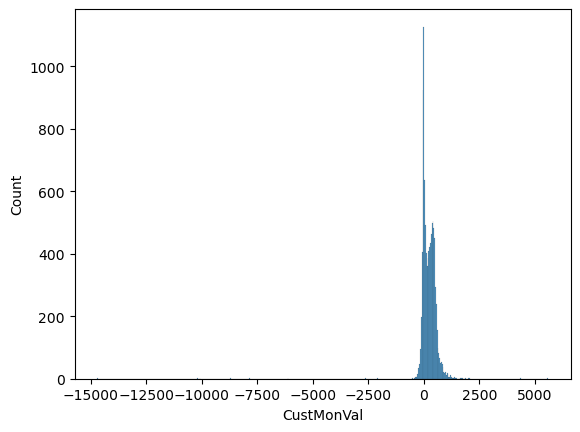

In [216]:
sns.histplot(data=df, x="CustMonVal")

The Claims Rate behaves a lot better without these 8 observations, they can be still considered outliers.

In [217]:
len(df[df["ClaimsRate"]>2.5])

8

In [218]:
#df.drop(df[df["ClaimsRate"]>2.5].index, inplace=True)

<AxesSubplot: xlabel='ClaimsRate', ylabel='Count'>

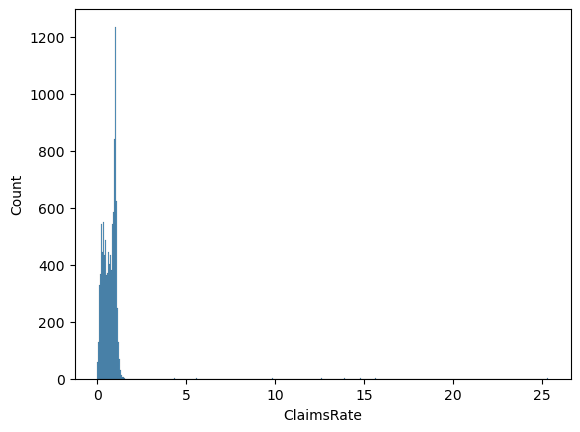

In [219]:
sns.histplot(data=df, x="ClaimsRate")

Might be able to take these 4 observations of PremMotor without a big impact on the dataset and still thus solving the problem

In [220]:
len(df[df["PremMotor"]>1000])

4

In [221]:
#df.drop(df[df["PremMotor"]>1000].index, inplace=True)

<AxesSubplot: xlabel='PremMotor', ylabel='Count'>

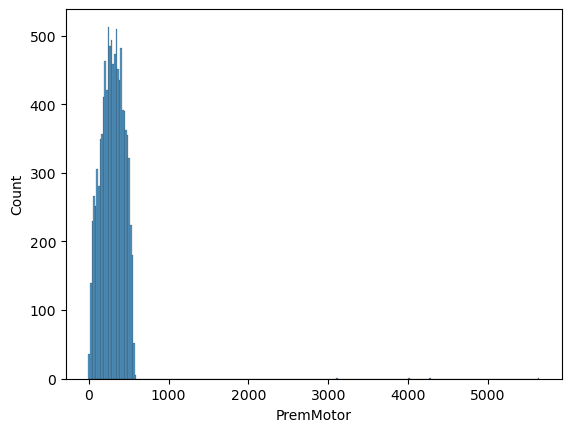

In [222]:
sns.histplot(data=df, x="PremMotor")

The other distributions have very heavy tails that are not due to outliers. To try to reduce the tail, one possible transformation is the log.
PremHousehold, PreLife,PremWork, TotalPrem, and a little PremHealth

In [223]:
#df["log_PremHousehold"]= np.log(df["PremHousehold"]-min(df["PremHousehold"])+1)
#sns.histplot(data=df, x="log_PremHousehold")

In [230]:
#df["log_PremLife"]= np.log(df["PremLife"]-min(df["PremLife"]))
#sns.histplot(data=df, x="log_PremLife")
print(len(np.log(df["PremLife"]-min(df["PremLife"]))))
df["PremLife"].isnull().sum()
pd.DataFrame(np.log(df["PremLife"]-min(df["PremLife"]))).isnull().sum()

10097


PremLife    89
dtype: int64

In [231]:
test= pd.DataFrame(np.log(df["PremLife"]-min(df["PremLife"])))
scaler = RobustScaler()
test_robust = scaler.fit_transform(test[test.columns])
test[test.columns]=test_robust.copy()

ValueError: Input contains infinity or a value too large for dtype('float64').

In [151]:
#df["log_TotalPrem"]= np.log(df["TotalPrem"]-min(df["TotalPrem"]))
#sns.histplot(data=df, x="log_TotalPrem")

In [152]:
df.isnull().sum()

FirstPolYear     24
EducDeg          14
MonthSal          0
GeoLivArea        1
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife         89
PremWork          0
TotalPrem        89
Age               0
dtype: int64

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">
Código para antes de "Missing Value Detection"

In [ ]:
sns.histplot(data=df, x="PremMotor")
plt.xlim(None, 1000)
plt.show()

In [10]:
import numpy as np
np.log(np.NaN)

nan